**Data Import**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seattle_calendar = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/seattle_calendar.csv')
seattle_listings = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/seattle_listings.csv')
seattle_reviews = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/seattle_reviews.csv')
boston_calendar = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/boston_calendar.csv')
boston_listings = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/boston_listings.csv')
boston_reviews = pd.read_csv('//GBMLVFILFS01N02.rbsres01.net/home8$/Evanrdo/Personal/DS Nanodegree/boston_reviews.csv')

**Data Understanding and Data Cleaning**

In [3]:
display(seattle_listings.head(1))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [4]:
display(len(seattle_listings['id'].unique().tolist()))
display(len(boston_listings['id'].unique().tolist()))

3818

3585

Roughly around the same amount of listings in both cities.

In [5]:
display(seattle_listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
display(seattle_calendar.head(1))

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [7]:
display(seattle_calendar['date'].min())
display(seattle_calendar['date'].max())
display(boston_calendar['date'].min())
display(boston_calendar['date'].max())

'2016-01-04'

'2017-01-02'

'2016-09-06'

'2017-09-05'

The date period for the two cities are not equal, we should therefore be cautious when comparing the data.

In [8]:
display(seattle_calendar['available'].isna().mean())
display(seattle_calendar['price'].isna().mean())
display(boston_calendar['available'].isna().mean())
display(boston_calendar['price'].isna().mean())

0.0

0.32938998399793334

0.0

0.5087157820748879

There's a lot of null 'price' rows, however these don't need to be drop if we're only exploring the 'available' columns for example.

In [9]:
display(seattle_reviews.head(1))

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


In [79]:
display(seattle_reviews['comments'].value_counts().head())

comments
The host canceled this reservation the day before arrival. This is an automated posting.    57
The reservation was canceled the day before arrival. This is an automated posting.          48
The host canceled this reservation 4 days before arrival. This is an automated posting.     22
The reservation was canceled 2 days before arrival. This is an automated posting.           19
The host canceled this reservation 2 days before arrival. This is an automated posting.     17
Name: count, dtype: int64

Working with the reviews dataframe will mainly require a key word search to pull out the relevant comments.

**Question 1 - Cost of AirBnbs**

In [10]:
seattle_calendar_price = seattle_calendar.dropna(subset= ["price"])
boston_calendar_price = boston_calendar.dropna(subset= ["price"])

As we're initially only looking at the price of these cities, it's best to drop the nulls.

In [11]:
seattle_calendar_price["price"] = seattle_calendar_price["price"].str.replace('$', '')
seattle_calendar_price["price"] = pd.to_numeric(seattle_calendar_price["price"], errors='coerce')
display(seattle_calendar_price['price'].mean())

C:\Users\evanrdo\AppData\Local\Temp\ipykernel_14268\152802929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_calendar_price["price"] = seattle_calendar_price["price"].str.replace('$', '')
C:\Users\evanrdo\AppData\Local\Temp\ipykernel_14268\152802929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_calendar_price["price"] = pd.to_numeric(seattle_calendar_price["price"], errors='coerce')


137.19222676140043

In [12]:
boston_calendar_price["price"] = boston_calendar_price["price"].str.replace('$', '')
boston_calendar_price["price"] = pd.to_numeric(boston_calendar_price["price"], errors='coerce')
display(boston_calendar_price['price'].mean())

C:\Users\evanrdo\AppData\Local\Temp\ipykernel_14268\867018691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_calendar_price["price"] = boston_calendar_price["price"].str.replace('$', '')
C:\Users\evanrdo\AppData\Local\Temp\ipykernel_14268\867018691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_calendar_price["price"] = pd.to_numeric(boston_calendar_price["price"], errors='coerce')


192.45390955690283

In order to work with the 'price' column, the format of the string needs to be changed to only include a number which would then allow us to convert the column type to numeric. At this point, we can then work with the column to decipher variables such as the mean value. We can see that the average cost of an AirBnb listing in Boston is more expensive than in Seattle.

**Question 2 - Peak Times**

In [13]:
seattle_calendar["price"] = seattle_calendar["price"].str.replace('$', '')
seattle_calendar["price"] = pd.to_numeric(seattle_calendar["price"], errors='coerce')

In [14]:
boston_calendar["price"] = boston_calendar["price"].str.replace('$', '')
boston_calendar["price"] = pd.to_numeric(boston_calendar["price"], errors='coerce')

As we're now concerned with the 'available' column, the null 'price' column do not need to be dropped as it doesn't affect the output. However, if we want to work with the 'price' column at all, it still needs to be converted to numeric.

In [15]:
def booked(row):
   if row['available'] == 't':
      return 1
   if row['available'] != 't':
      return 0

As 'available' column is a boolean type, we create an additional column which provides the same data but in a numerical format. This then allows us to get insights.

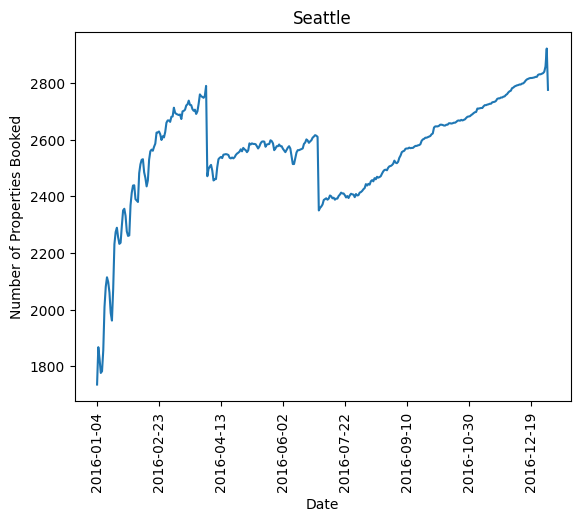

In [40]:
seattle_calendar['booked'] = seattle_calendar.apply(booked, axis=1)
popularity_by_date_seattle = seattle_calendar.groupby('date')['booked'].sum()
popularity_by_date_seattle.plot(kind='line', rot=90);
plt.title('Seattle')
plt.xlabel("Date")
plt.ylabel("Number of Properties Booked")
plt.show()

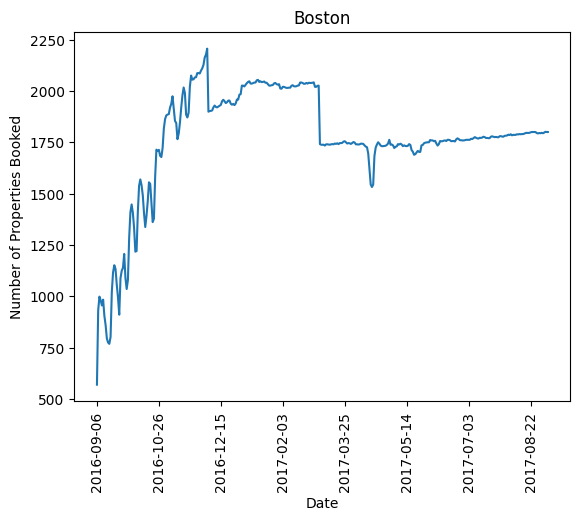

In [41]:
boston_calendar['booked'] = boston_calendar.apply(booked, axis=1)
popularity_by_date_boston = boston_calendar.groupby('date')['booked'].sum()
popularity_by_date_boston.plot(kind='line', rot=90);
plt.title('Boston')
plt.xlabel("Date")
plt.ylabel("Number of Properties Booked")
plt.show()

By grouping the dataframe by date and summing the 'booked' column, this shows us how many listings are occupied per day. From this, we can calculate what is the peak times for both cities.

In [43]:
display(popularity_by_date_seattle.sort_values(ascending=False).head(1))
display(popularity_by_date_seattle.sort_values(ascending=True).head(1))

date
2017-01-01    2922
Name: booked, dtype: int64

date
2016-01-04    1735
Name: booked, dtype: int64

In [19]:
seattle_max_book = seattle_calendar[seattle_calendar['date'] == '2017-01-01']
seattle_min_book = seattle_calendar[seattle_calendar['date'] == '2016-01-04']

In [20]:
display(popularity_by_date_boston.sort_values(ascending=False).head(1))
display(popularity_by_date_boston.sort_values(ascending=True).head(1))

date
2016-12-04    2207
Name: booked, dtype: int64

date
2016-09-06    570
Name: booked, dtype: int64

In [21]:
boston_max_book = boston_calendar[boston_calendar['date'] == '2016-12-04']
boston_min_book = boston_calendar[boston_calendar['date'] == '2016-09-06']

In [22]:
display(seattle_calendar['price'].mean())
display(seattle_max_book['price'].mean())
display(seattle_min_book['price'].mean())
display(boston_calendar['price'].mean())
display(boston_max_book['price'].mean())
display(boston_min_book['price'].mean())

137.19222676140043

137.53664383561645

122.08587896253603

192.45390955690283

179.81326669695594

239.71001757469244

By looking at the average 'price' value at the most popular and least popular date of booking, we can see if there's any shifting because of demand. Interestingly, it's cheaper to book Boston at the peak time relative to the yearly average. 

**Question 3 - Value for money**

In [23]:
seattle_listings["price"] = seattle_listings["price"].str.replace('$', '')
seattle_listings["price"] = pd.to_numeric(seattle_listings["price"], errors='coerce')
seattle_listings["price_per_person"] = seattle_listings["price"] / seattle_listings["accommodates"]
seattle_listings["cleaning_fee"] = seattle_listings["cleaning_fee"].str.replace('$', '')
seattle_listings["cleaning_fee"] = pd.to_numeric(seattle_listings["cleaning_fee"], errors='coerce')
seattle_listings["cleaning_per_person"] = seattle_listings["cleaning_fee"] / seattle_listings["accommodates"]
seattle_listings["security_deposit"] = seattle_listings["security_deposit"].str.replace('$', '')
seattle_listings["security_deposit"] = pd.to_numeric(seattle_listings["security_deposit"], errors='coerce')
seattle_listings["security_per_person"] = seattle_listings["security_deposit"] / seattle_listings["accommodates"]
seattle_listings['cost_per_person'] = seattle_listings["price_per_person"] + seattle_listings['cleaning_per_person'] + seattle_listings['security_per_person']

In [24]:
boston_listings["price"] = boston_listings["price"].str.replace('$', '')
boston_listings["price"] = pd.to_numeric(boston_listings["price"], errors='coerce')
boston_listings["price_per_person"] = boston_listings["price"] / seattle_listings["accommodates"]
boston_listings["cleaning_fee"] = boston_listings["cleaning_fee"].str.replace('$', '')
boston_listings["cleaning_fee"] = pd.to_numeric(boston_listings["cleaning_fee"], errors='coerce')
boston_listings["cleaning_per_person"] = boston_listings["cleaning_fee"] / boston_listings["accommodates"]
boston_listings["security_deposit"] = boston_listings["security_deposit"].str.replace('$', '')
boston_listings["security_deposit"] = pd.to_numeric(boston_listings["security_deposit"], errors='coerce')
boston_listings["security_per_person"] = boston_listings["security_deposit"] / boston_listings["accommodates"]
boston_listings['cost_per_person'] = boston_listings["price_per_person"] + boston_listings['cleaning_per_person'] + boston_listings['security_per_person']

When booking the listing, the cost is made up of the overall price, cleaning and deposit fee. As most people use AirBnb between multiple people, it's useful to see what this cost is at a per person basis.

In [25]:
display(seattle_listings['cost_per_person'].mean())
display(boston_listings['cost_per_person'].mean())

146.8128295607145

198.53066925092787

In [26]:
def value_for_money_seattle(row):
   if (row['cost_per_person'] <= 146.8128295607145) & (row['review_scores_rating'] >= 90):
      return 1
   else:
      return 0

In [27]:
seattle_listings['value_for_money'] = seattle_listings.apply(value_for_money_seattle, axis=1)
display((seattle_listings['value_for_money'].sum())/(seattle_listings.shape[0]/2) * 100)

40.963855421686745

In [28]:
def value_for_money_boston(row):
   if (row['cost_per_person'] <= 198.53066925092787) & (row['review_scores_rating'] >= 90):
      return 1
   else:
      return 0

In [29]:
boston_listings['value_for_money'] = boston_listings.apply(value_for_money_boston, axis=1)
display((boston_listings['value_for_money'].sum())/(boston_listings.shape[0]/2) * 100)

23.87726638772664

Once we know what the cost per person is, we can see what's the best budget option - i.e a listing which cheaper than the average but still provides a good review score. You're more likely to get a good budget option in Seattle as a 41% of listings under the average cost per person value still have a review score of over 90, as oppose to only 24% in Boston.

In [75]:
seattle_listings['Satisfaction per Dollar'] = (seattle_listings['review_scores_rating'] / seattle_listings['cost_per_person'].mean())
seattle_listings['Satisfaction per Dollar'] = (seattle_listings['Satisfaction per Dollar'] - seattle_listings['Satisfaction per Dollar'].min()) / (seattle_listings['Satisfaction per Dollar'].max() - seattle_listings['Satisfaction per Dollar'].min())
display(seattle_listings['Satisfaction per Dollar'].mean())

0.931740775780511

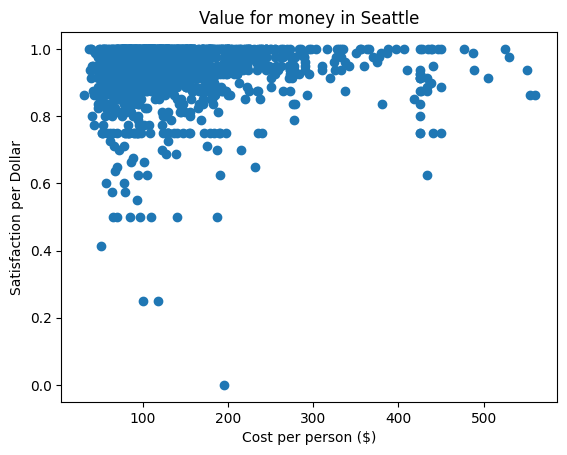

In [76]:
plt.scatter(seattle_listings['cost_per_person'], seattle_listings['Satisfaction per Dollar'])
plt.title('Value for money in Seattle')
plt.xlabel("Cost per person ($)")
plt.ylabel("Satisfaction per Dollar");
plt.show()

In [77]:
boston_listings['Satisfaction per Dollar'] = (boston_listings['review_scores_rating'] / boston_listings['cost_per_person'].mean())
boston_listings['Satisfaction per Dollar'] = (boston_listings['Satisfaction per Dollar'] - boston_listings['Satisfaction per Dollar'].min()) / (boston_listings['Satisfaction per Dollar'].max() - boston_listings['Satisfaction per Dollar'].min())
display(boston_listings['Satisfaction per Dollar'].mean())

0.8989583333333333

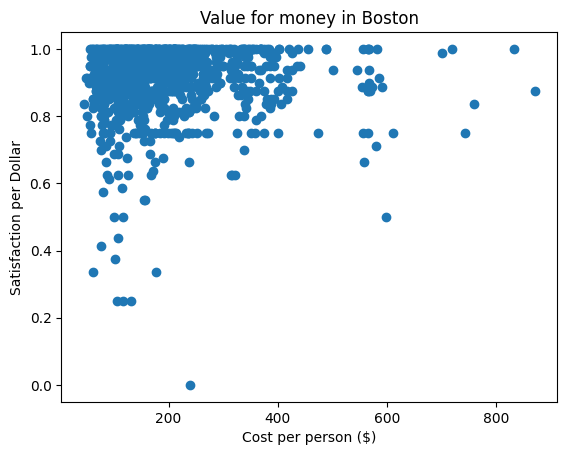

In [78]:
plt.scatter(boston_listings['cost_per_person'], boston_listings['Satisfaction per Dollar'])
plt.title('Value for money in Boston')
plt.xlabel("Cost per person ($)")
plt.ylabel("Satisfaction per Dollar");
plt.show()

On top of a budget option, we also want to look at where provides the best value for money, even if we're spending a bit more. Therefore, by dividing the 'review_scores_rating' with the mean value of 'cost_per_person', this gives us a new metric which measure the 'Satisfaction per Dollar' This metric could also be further sliced if we wanted to look at budget options but on the whole, better value for money is found in Seattle.

**Question 4 - Reviews about location.**

In [30]:
display(len(seattle_reviews['listing_id'].unique().tolist()))
seattle_listings_df = seattle_listings[seattle_listings['review_scores_rating'] >= 90]
seattle_listings_list = seattle_listings_df['id'].unique().tolist()
seattle_reviews_df = seattle_reviews[seattle_reviews['listing_id'].isin(seattle_listings_list)]
display(len(seattle_reviews_df['listing_id'].unique().tolist()))

3191

2745

In [31]:
seattle_comments = seattle_reviews_df[seattle_reviews_df['comments'].str.contains('location', na=False)]
display(len(seattle_comments['listing_id'].unique().tolist()))
display((len(seattle_comments['listing_id'].unique().tolist()))/(len(seattle_reviews_df['listing_id'].unique().tolist())) * 100)

2345

85.42805100182149

In [32]:
display(len(boston_reviews['listing_id'].unique().tolist()))
boston_listings_df = boston_listings[boston_listings['review_scores_rating'] >= 90]
boston_listings_list = boston_listings_df['id'].unique().tolist()
boston_reviews_df = boston_reviews[boston_reviews['listing_id'].isin(boston_listings_list)]
display(len(boston_reviews_df['listing_id'].unique().tolist()))

2829

2052

In [33]:
boston_comments = boston_reviews_df[boston_reviews_df['comments'].str.contains('location', na=False)]
display(len(boston_comments['listing_id'].unique().tolist()))
display((len(boston_comments['listing_id'].unique().tolist()))/(len(boston_reviews_df['listing_id'].unique().tolist())) * 100)

1644

80.11695906432749

Of the listings which recieve a review score of higher than 90 and filtering the comments for the key word 'location', this shows the listings where location plays a role in determining the high review score. Of course, those doesn't mean that the comment regarding 'location' has to be positive, however it is likely due to the score rating and this is beneficial when planning a trip. As we can see, the percentage of listings is higher for Seattle compared to Boston.